# <font color=red><b><i><center> Telecom company - Customer churn prediction </center></b></i></font>

# Tasks:
# Testing different Predictive models on the dataset to see which one gives the highest accuracy on yes class for customer churn.

# Considering aspects like overfitting and test the model on different variable values to find the best model for prediction.

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import seaborn as sns

## Read Data

In [2]:
# Read data
telecom = pd.read_csv("Telco-Customer-Churn.csv")
telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167,28168,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
28168,28169,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
28169,28170,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
28170,28171,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Show the head rows of a data frame
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explore data

In [4]:
#Explore (descriptive statistic)
telecom.describe()

,customerID,SeniorCitizen,tenure,MonthlyCharges
count,28172.000000,28172.000000,28172.000000,28172.000000
mean,14086.500000,0.162147,32.371149,64.761692
std,8132.700228,0.368592,24.558173,30.088445
min,1.000000,0.000000,0.000000,18.250000
25%,7043.750000,0.000000,9.000000,35.500000
50%,14086.500000,0.000000,29.000000,70.350000
75%,21129.250000,0.000000,55.000000,89.850000
max,28172.000000,1.000000,72.000000,118.750000


<AxesSubplot:>

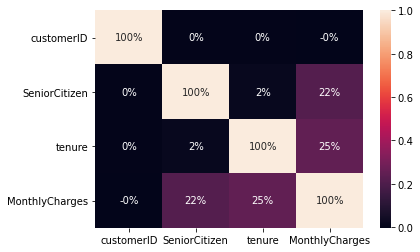

In [5]:
#vizualize the correlation between the attributes of the data
sns.heatmap(telecom.corr(), annot = True, fmt = '.0%')

###to view the following plot for all variables in a larger size uncomment the following line of code.

#sns.set(rc={'figure.figsize':(20,10)})


## Examine and change variable type

In [6]:
# Examine variable type
telecom.dtypes

customerID            int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Change categorical variables to "category"
telecom['customerID'] = telecom['customerID'].astype('category')
telecom['gender'] = telecom['gender'].astype('category')
telecom['Partner'] = telecom['Partner'].astype('category')
telecom['Dependents'] = telecom['Dependents'].astype('category')
telecom['PhoneService'] = telecom['PhoneService'].astype('category')
telecom['MultipleLines'] = telecom['MultipleLines'].astype('category')
telecom['InternetService'] = telecom['InternetService'].astype('category')
telecom['OnlineSecurity'] = telecom['OnlineSecurity'].astype('category')
telecom['OnlineBackup'] = telecom['OnlineBackup'].astype('category')
telecom['DeviceProtection'] = telecom['DeviceProtection'].astype('category')
telecom['TechSupport'] = telecom['TechSupport'].astype('category')
telecom['StreamingTV'] = telecom['StreamingTV'].astype('category')
telecom['Contract'] = telecom['Contract'].astype('category')
telecom['StreamingMovies'] = telecom['StreamingMovies'].astype('category')
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].astype('category')
telecom['PaymentMethod'] = telecom['PaymentMethod'].astype('category')
telecom['Churn'] = telecom['Churn'].astype('category')

## Creating dummy variables

In [8]:
# Create dummy variables 
telecom = pd.get_dummies(telecom, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Contract'], drop_first=True)
telecom

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,1,0,1,29.85,29.85,No,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,2,0,34,56.95,1889.5,No,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,3,0,2,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,4,0,45,42.30,1840.75,No,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,2,70.70,151.65,Yes,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167,28168,0,24,84.80,1990.5,No,1,1,1,1,...,0,1,0,1,1,0,0,1,1,0
28168,28169,0,72,103.20,7362.9,No,0,1,1,1,...,0,1,0,1,1,1,0,0,1,0
28169,28170,0,11,29.60,346.45,No,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
28170,28171,1,4,74.40,306.6,Yes,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0


## Check for null values

In [9]:
telecom.isnull().sum().sum()

0

## Partition the data into testing and training data

In [10]:
# Partition the data 
target = telecom['Churn']
predictors = telecom.drop(['Churn','customerID','TotalCharges'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(19720, 29) (8452, 29) (19720,) (8452,)


In [11]:
# Examine the porportion of target variable for training data set 
print(target_train.value_counts(normalize=True))

No     0.732657
Yes    0.267343
Name: Churn, dtype: float64


In [12]:
# Examine the porportion of target variable for testing data set 
print(target_test.value_counts(normalize=True))

No     0.739233
Yes    0.260767
Name: Churn, dtype: float64


# Naive Bayes

In [13]:
# Build a Naive Bayes model on training data with default setting 
modelNB = MultinomialNB()
modelNB.fit(predictors_train, target_train)

MultinomialNB()

In [14]:
# Make predictions on testing data
prediction_on_test = modelNB.predict(predictors_test)

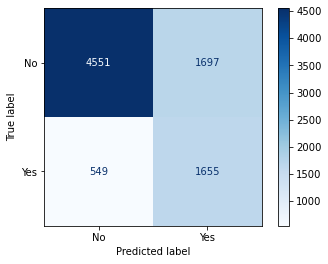

In [15]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(modelNB, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [16]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      6248
         Yes       0.49      0.75      0.60      2204

    accuracy                           0.73      8452
   macro avg       0.69      0.74      0.70      8452
weighted avg       0.79      0.73      0.75      8452



# KNN Models

In [17]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.0,0.013889,0.115423,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.472222,0.385075,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.027778,0.354229,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.625000,0.239303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.027778,0.521891,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167,0.0,0.333333,0.662189,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
28168,0.0,1.000000,0.845274,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
28169,0.0,0.152778,0.112935,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28170,1.0,0.055556,0.558706,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## KNN neighbors =1

In [18]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 1 
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
# Make predictions on training and testing data 
prediction_on_train = model1.predict(predictors_train)
prediction_on_test = model1.predict(predictors_test)

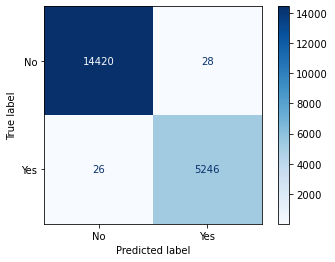

In [20]:
# Examine the evaluation results on training data: confusion_matrix 
plot_confusion_matrix(model1, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [21]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score 
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     14448
         Yes       0.99      1.00      0.99      5272

    accuracy                           1.00     19720
   macro avg       1.00      1.00      1.00     19720
weighted avg       1.00      1.00      1.00     19720



### Above KNN model with n=1 is an overfitting model as the accuracy is too high and we believe model is biased due to just one neighbor and lack of variables.

## KNN neighbors =5

In [26]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 5
model5 = KNeighborsClassifier(n_neighbors = 5)
model5.fit(predictors_train, target_train)

KNeighborsClassifier()

In [27]:
# Make predictions on training and testing data
prediction_on_train = model5.predict(predictors_train)
prediction_on_test = model5.predict(predictors_test)

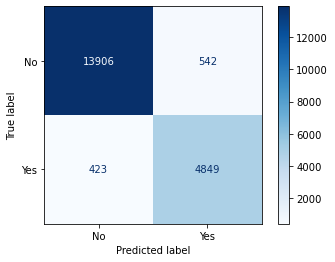

In [28]:
# Examine the evaluation results on training data: confusion_matrix 
plot_confusion_matrix(model5, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [29]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score 
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.97      0.96      0.97     14448
         Yes       0.90      0.92      0.91      5272

    accuracy                           0.95     19720
   macro avg       0.93      0.94      0.94     19720
weighted avg       0.95      0.95      0.95     19720



## KNN neighbors =10

In [30]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 10
model10 = KNeighborsClassifier(n_neighbors = 10)
model10.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
# Make predictions on training and testing data
prediction_on_train = model10.predict(predictors_train)
prediction_on_test = model10.predict(predictors_test)

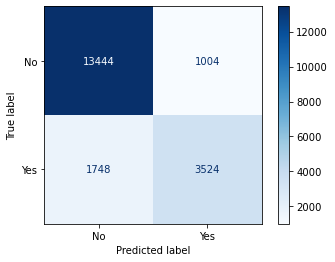

In [32]:
# Examine the evaluation results on training data: confusion_matrix 
plot_confusion_matrix(model10, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [33]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score 
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.88      0.93      0.91     14448
         Yes       0.78      0.67      0.72      5272

    accuracy                           0.86     19720
   macro avg       0.83      0.80      0.81     19720
weighted avg       0.86      0.86      0.86     19720



# Random forest classifier

In [34]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=9)
model_rf.fit(predictors_train, target_train)

RandomForestClassifier(max_depth=9)

In [35]:
# Make predictions on testing data
prediction_on_test = model_rf.predict(predictors_test)

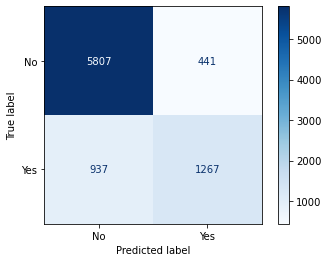

In [36]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model_rf, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [37]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      6248
         Yes       0.74      0.57      0.65      2204

    accuracy                           0.84      8452
   macro avg       0.80      0.75      0.77      8452
weighted avg       0.83      0.84      0.83      8452



# XGBoost classifier

In [38]:
# Create dummy variables 
telecom = pd.get_dummies(telecom, columns=['Churn'], drop_first=True)
telecom

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,Churn_Yes
0,1,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,2,0,34,56.95,1889.5,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,3,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,4,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167,28168,0,24,84.80,1990.5,1,1,1,1,0,...,1,0,1,1,0,0,1,1,0,0
28168,28169,0,72,103.20,7362.9,0,1,1,1,0,...,1,0,1,1,1,0,0,1,0,0
28169,28170,0,11,29.60,346.45,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,0
28170,28171,1,4,74.40,306.6,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [39]:
# Partition the data 
target = telecom['Churn_Yes']
predictors = telecom.drop(['Churn_Yes','customerID','TotalCharges'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(19720, 29) (8452, 29) (19720,) (8452,)


In [40]:
model_xg = XGBClassifier()
model_xg.fit(predictors_train, target_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
# Make predictions on testing data
prediction_on_test = model_xg.predict(predictors_test)

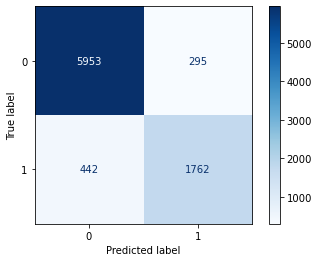

In [42]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model_xg, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [43]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6248
           1       0.86      0.80      0.83      2204

    accuracy                           0.91      8452
   macro avg       0.89      0.88      0.88      8452
weighted avg       0.91      0.91      0.91      8452



# All the above models are giving us good accuracy results (approx 80%) but out of all the above models we got the best accuracy for KNN with  5 neighbors  i.e 95%. 
# The next best model is XGBoost classifier with 91% accuracy. 

# We are not considering KNN n=1 as it is an overfitting model as the accuracy is too high and we believe model is biased due to just one neighbor and lack of variables.¶
# Overall the accuracy of all the models is above 80% which aligns with our benchmark accuracy for running the predictive modeling over this dataset.
